# Foot-Traffic Prediction System

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Importing the data

In [2]:
og_df=pd.read_csv("./hpg_reserve.csv")
og_df.head(25)

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13
5,hpg_28bdf7a336ec6a7b,2016-01-01 17:00:00,2016-01-01 15:00:00,2
6,hpg_2a01a042bca04ad9,2016-01-01 17:00:00,2016-01-01 17:00:00,2
7,hpg_2a84dd9f4c140b82,2016-01-01 17:00:00,2016-01-01 15:00:00,2
8,hpg_2ad179871696901f,2016-01-01 17:00:00,2016-01-01 13:00:00,2
9,hpg_2c1d989eedb0ff83,2016-01-01 17:00:00,2016-01-01 15:00:00,6


In [2]:
df=pd.read_csv("./hpg_reserve.csv").drop(["hpg_store_id", "reserve_datetime"], axis=1)
df=pd.DataFrame(df.groupby(['visit_datetime']).count()).reset_index()
df['day'] = pd.to_datetime(df['visit_datetime']).dt.day
df['day_of_week'] = pd.to_datetime(df['visit_datetime']).dt.weekday
df['month'] = pd.to_datetime(df['visit_datetime']).dt.month
df['year'] = pd.to_datetime(df['visit_datetime']).dt.year
df['hour'] = pd.to_datetime(df['visit_datetime']).dt.hour
df.drop(['visit_datetime'], axis=1, inplace=True)
df = df.rename(columns={'reserve_visitors': 'visitors'})
df = df[['day', 'day_of_week', 'month', 'year', 'hour', 'visitors']]
df.head(25)

,day,day_of_week,month,year,hour,visitors
0,1,4,1,2016,11,1
1,1,4,1,2016,13,1
2,1,4,1,2016,16,1
3,1,4,1,2016,17,32
4,1,4,1,2016,18,44
5,1,4,1,2016,19,51
6,1,4,1,2016,20,15
7,1,4,1,2016,21,3
8,1,4,1,2016,22,4
9,2,5,1,2016,10,1


## Data Visualization

<AxesSubplot:xlabel='day', ylabel='visitors'>

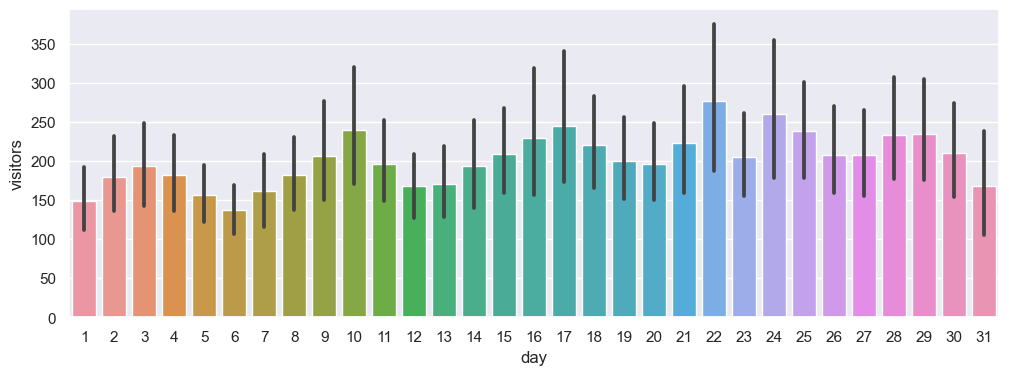

In [4]:
sns.set(rc={'figure.figsize':(12,4)})
sns.barplot(data=df, x="day", y="visitors")

<AxesSubplot:xlabel='day_of_week', ylabel='visitors'>

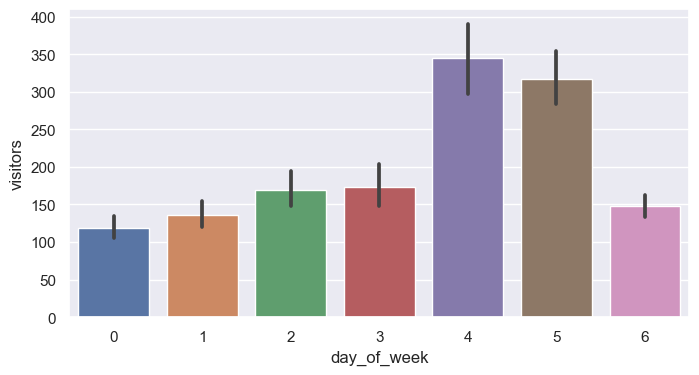

In [5]:
sns.set(rc={'figure.figsize':(8,4)})
sns.barplot(data=df, x="day_of_week", y="visitors")

<AxesSubplot:xlabel='month', ylabel='visitors'>

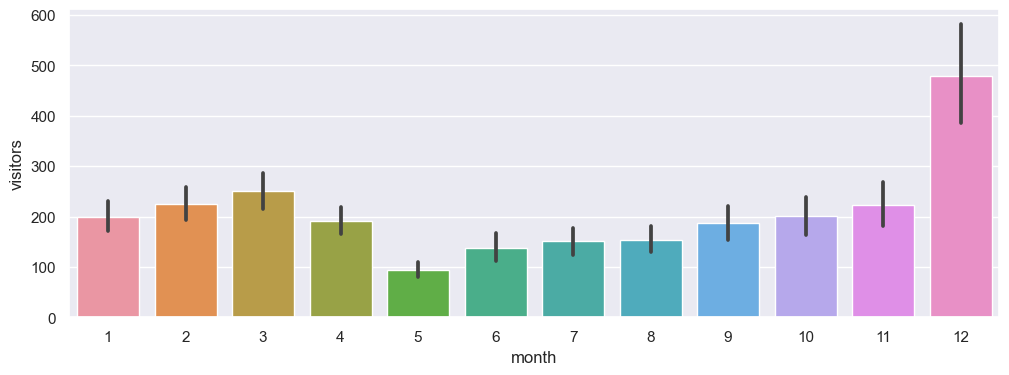

In [6]:
sns.set(rc={'figure.figsize':(12,4)})
sns.barplot(data=df, x="month", y="visitors")

<AxesSubplot:xlabel='year', ylabel='visitors'>

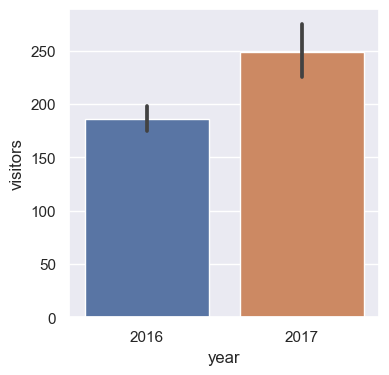

In [7]:
sns.set(rc={'figure.figsize':(4,4)})
sns.barplot(data=df, x="year", y="visitors")

<AxesSubplot:xlabel='hour', ylabel='visitors'>

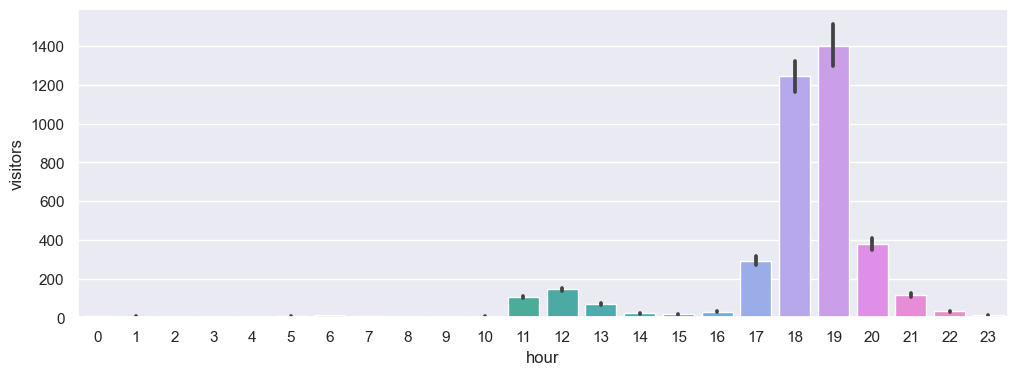

In [8]:
sns.set(rc={'figure.figsize':(12,4)})
sns.barplot(data=df, x="hour", y="visitors")

<AxesSubplot:>

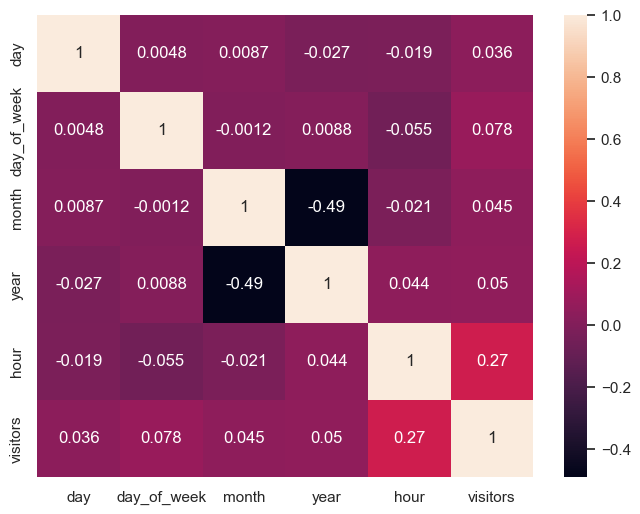

In [9]:
sns.set(rc={'figure.figsize':(8,6)})
sns.heatmap(df.corr(), annot=True)

## Train-Test Split

In [3]:
X = df.drop(columns='visitors', axis=1)
Y = df['visitors']

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

## Training the model

In [5]:
regressor = XGBRegressor()

In [6]:
regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Model Evaluation

In [7]:
train_pred = regressor.predict(x_train)

In [8]:
r2_train = metrics.r2_score(y_train, train_pred)
print('R squared value : ', r2_train)

R squared value :  0.9941762986819077


In [9]:
test_pred = regressor.predict(x_test)

In [10]:
r2_test = metrics.r2_score(y_test, test_pred)
print('R squared value : ', r2_test)

R squared value :  0.8748986619611803


## Prediction System

In [11]:
print("Enter the input data for the prediction :-")
day=int(input("Enter the day : "))
day_of_week=int(input("Enter the day of the week : "))
month=int(input("Enter the month : "))
year=int(input("Enter the year : "))
hour=int(input("Enter the hour : "))
input_data=[day, day_of_week, month, year, hour]
series = {'day': [day],
          'day_of_week': [day_of_week],
          'month': [month],
          'year': [year],
          'hour': [hour]
           }
vector = pd.DataFrame(series)
names = regressor.get_booster().feature_names
result = regressor.predict(vector[names].iloc[[-1]])
print()
print("The predicted foot-traffic on the given date and time is "+str(round(result[0]))+ " people.")

Enter the input data for the prediction :-
Enter the day : 4
Enter the day of the week : 3
Enter the month : 6
Enter the year : 2019
Enter the hour : 7

The predicted foot-traffic on the given date and time is -13 people.
